# đọc dữ liệu 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [8]:
df = pd.read_csv('C:\\Users\\FPTSHOP\\Downloads\\Credit_Scoring (3).csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [10]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


In [11]:
df.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29730
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

# Có phải những khách hàng không có người phụ thuộc sẽ có thu nhập trung bình theo tháng (MonthlyIncome) nhỏ hơn những khách hàng có người phụ thuộc không (với mức ý nghĩa 10%)

In [13]:
df_1 = df[['MonthlyIncome', 'NumberOfDependents']]

C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

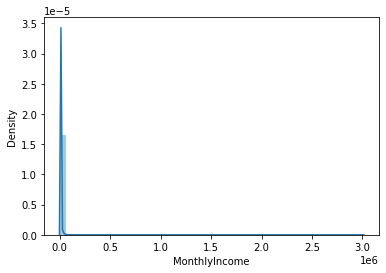

In [15]:
sns.distplot(df_1['MonthlyIncome'])

In [16]:
df_1.isna().sum()

MonthlyIncome         29730
NumberOfDependents     3924
dtype: int64

# loại bỏ các dữ liệu có MonthlyIncome = NULL

In [19]:
df_1 = df_1[df_1['MonthlyIncome'].isna() == False]

In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120262 entries, 1 to 149991
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MonthlyIncome       120262 non-null  float64
 1   NumberOfDependents  120262 non-null  float64
dtypes: float64(2)
memory usage: 2.8 MB


In [20]:
df_1.isna().sum()

MonthlyIncome         0
NumberOfDependents    0
dtype: int64

In [24]:
df_1['NumberOfDependents'].unique()

array([ 2.,  0.,  1.,  3.,  4.,  5.,  6.,  8.,  7., 20., 10.,  9., 13.])

# tiến hành kiểm định giả thiết ( kiểm định phía trái)
+ với mức ý nghĩa 10% => apla = 0.1
+ H0: khách hàng ko có người phụ thuộc thì có mức lương trung bình thấp hơn khách hàng có người phụ thuộc
+ H1: khách hàng ko có người phụ thuộc thì có mức lương trung bình cao hơn khách hàng có người phụ thuộc

In [22]:
stats.ttest_ind(df_1[df_1['NumberOfDependents']== 0]['MonthlyIncome'], df_1[df_1['NumberOfDependents']!= 0]['MonthlyIncome'], equal_var=False)

Ttest_indResult(statistic=-20.159688563453514, pvalue=3.59295701688606e-90)